In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
df = pd.read_csv('../datasets/winequality/winequality-red.csv')

# Data Exploration

In [97]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [98]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [99]:
print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


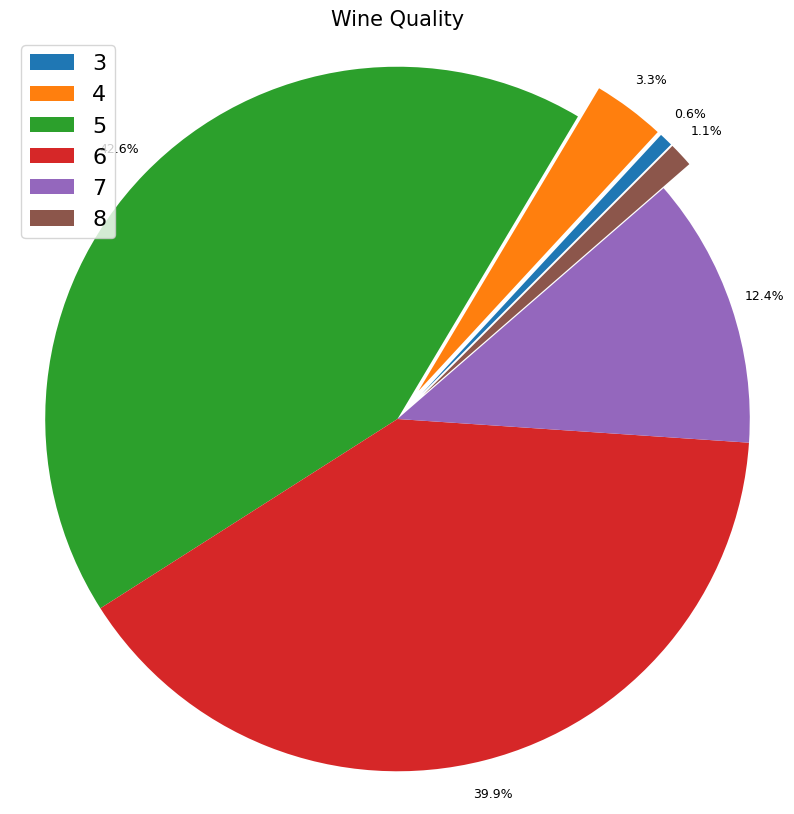

In [100]:
quality = df["quality"].value_counts().sort_index(ascending=True)
explode_list = [0.1, 0.1, 0, 0, 0, 0.1]
ax = quality.plot(kind='pie',
             figsize = (10,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             explode=explode_list,
             textprops={'fontsize': 9})
ax.patch.set_facecolor('white')
plt.title('Wine Quality', size = 15)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=quality.index, loc="upper left", fontsize=16)

<Axes: >

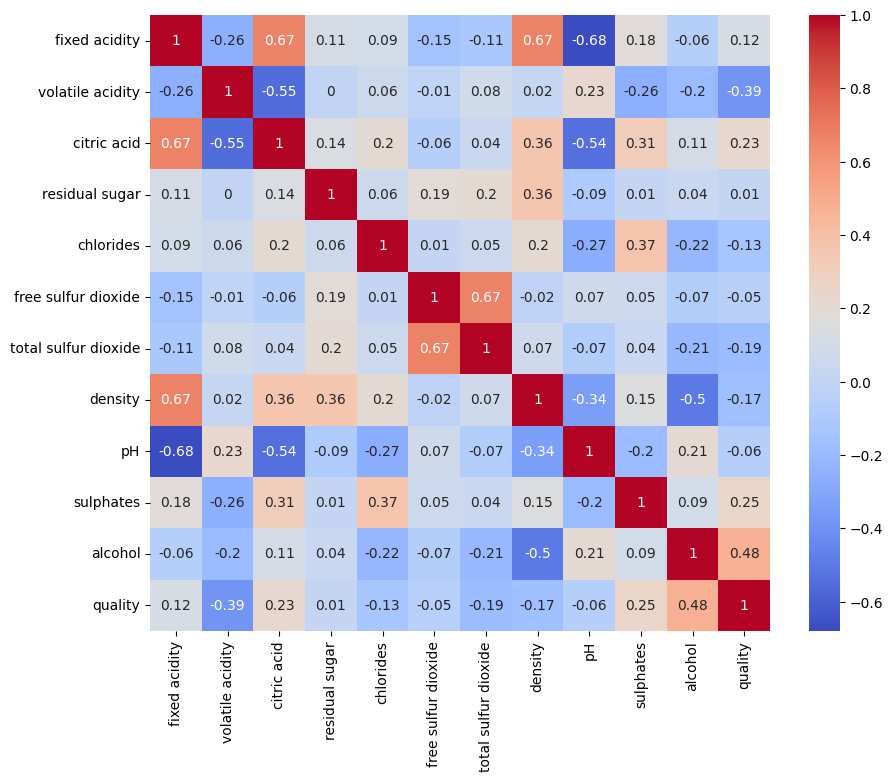

In [101]:
# write the heatmap for all dataset with sns rounding values to 2 decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')

<Axes: >

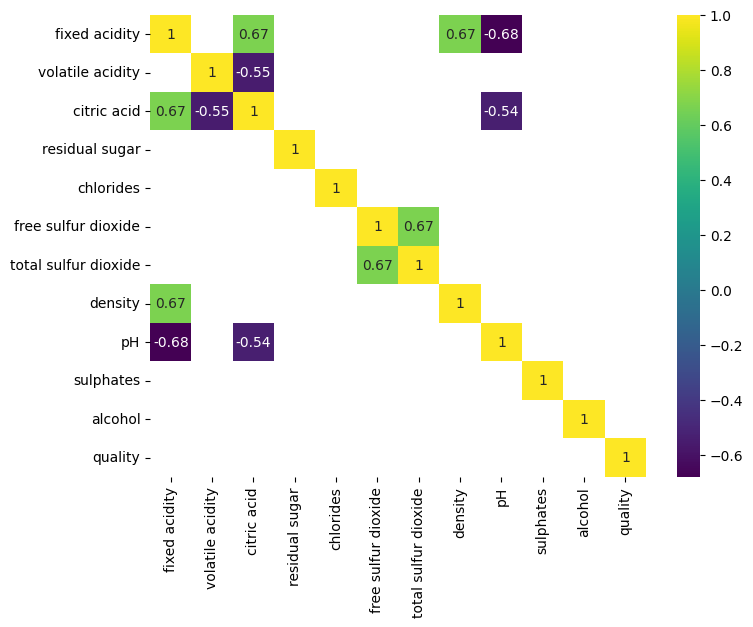

In [102]:
# write the heatmap with only the columns with correlation greater than 0.5 and less than -0.5
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr().round(2)[(df.corr().round(2) > 0.5) | (df.corr().round(2) < -0.5)], annot=True, cmap='viridis')

In [103]:
corr = df.corr()
for i in range(len(corr)):
    print('Positive correlation :\n')

    a = ((corr.iloc[i]>0.5) & (corr.iloc[i]!=1))
    print(a[a==True],'\n\n')

    b = ((corr.iloc[i]<(-0.5)) & (corr.iloc[i]!=1))

    print('Negative correlation :\n')
    print(b[b==True],'\n\n')

Positive correlation :

citric acid    True
density        True
Name: fixed acidity, dtype: bool 


Negative correlation :

pH    True
Name: fixed acidity, dtype: bool 


Positive correlation :

Series([], Name: volatile acidity, dtype: bool) 


Negative correlation :

citric acid    True
Name: volatile acidity, dtype: bool 


Positive correlation :

fixed acidity    True
Name: citric acid, dtype: bool 


Negative correlation :

volatile acidity    True
pH                  True
Name: citric acid, dtype: bool 


Positive correlation :

Series([], Name: residual sugar, dtype: bool) 


Negative correlation :

Series([], Name: residual sugar, dtype: bool) 


Positive correlation :

Series([], Name: chlorides, dtype: bool) 


Negative correlation :

Series([], Name: chlorides, dtype: bool) 


Positive correlation :

total sulfur dioxide    True
Name: free sulfur dioxide, dtype: bool 


Negative correlation :

Series([], Name: free sulfur dioxide, dtype: bool) 


Positive correlation :

free

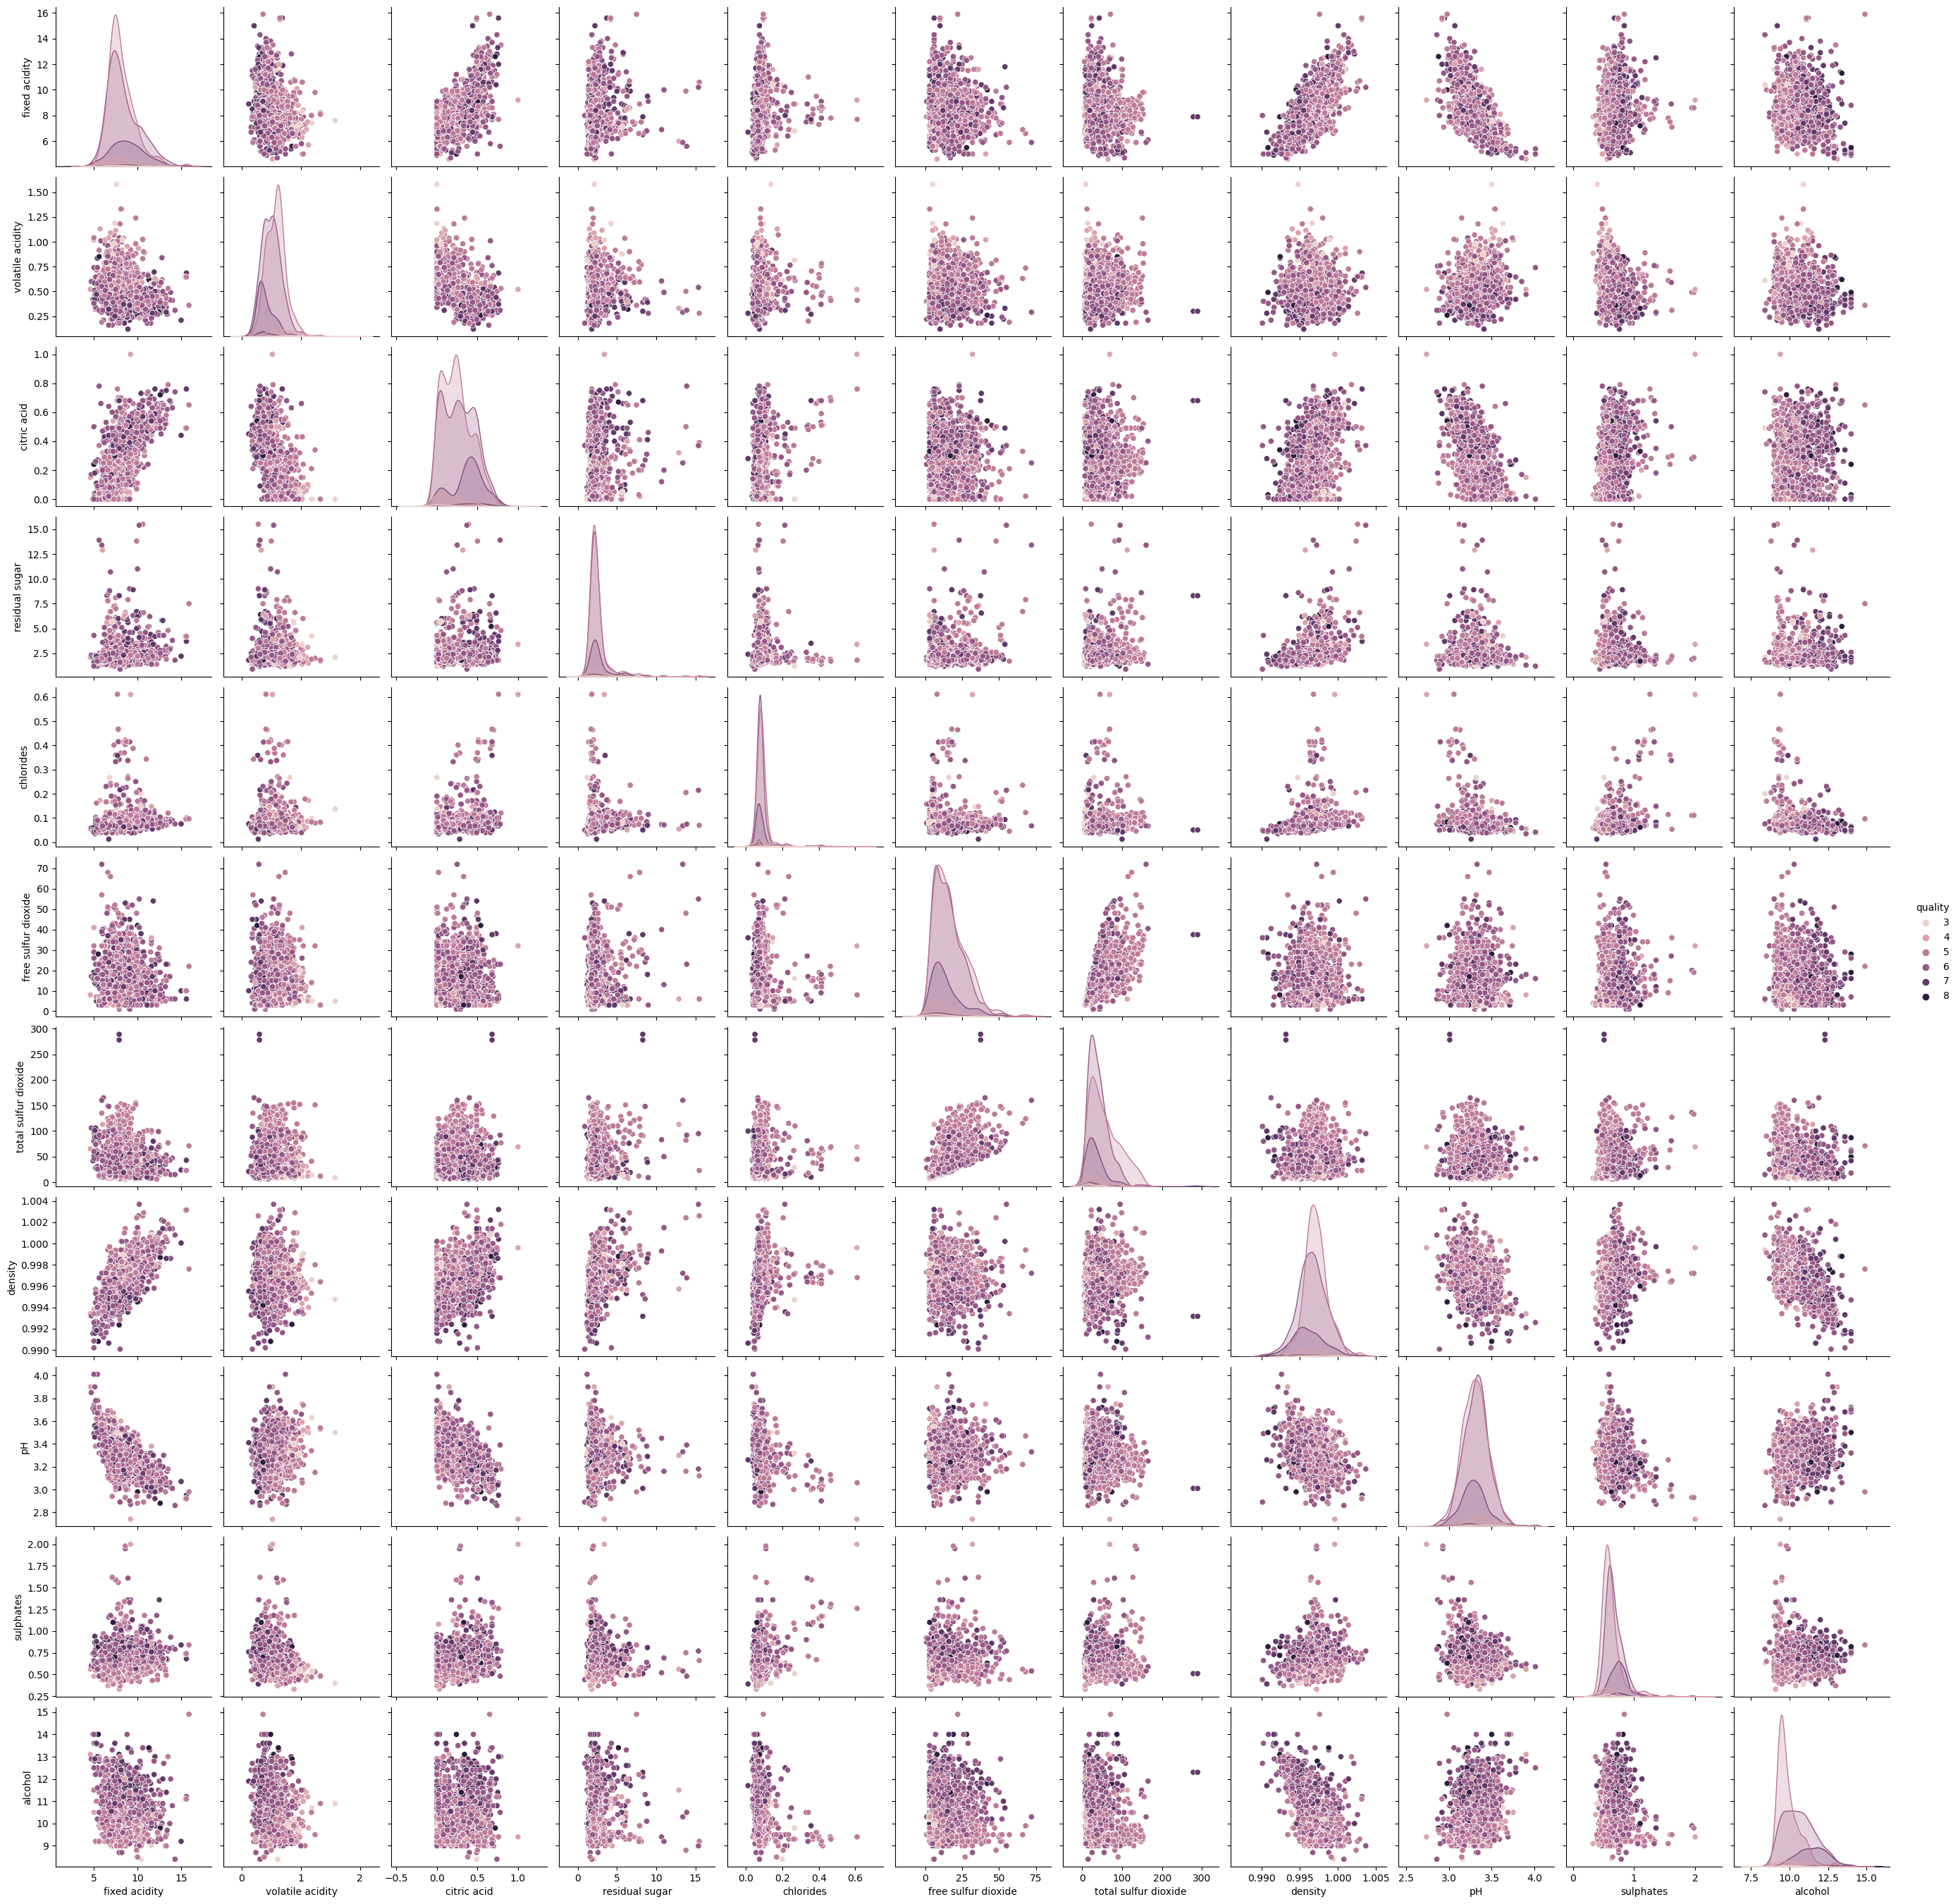

In [104]:
# Afficher les liens entre les correlations deux a deux lies des var lies entre elles
sns.pairplot(df, hue='quality')



sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))



<Figure size 600x400 with 0 Axes>

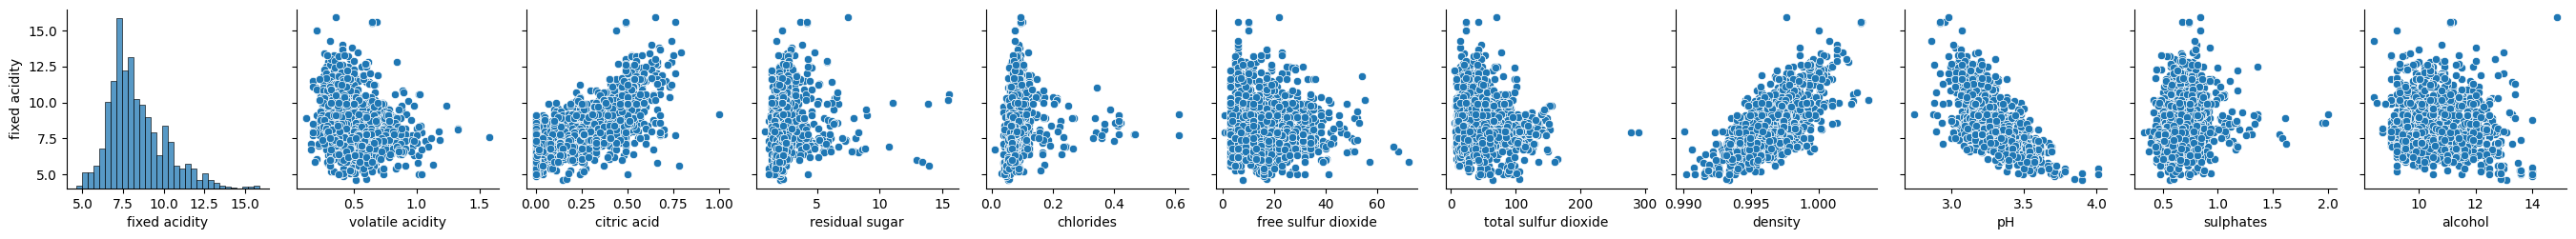

In [105]:
plt.figure(figsize=(6, 4))
sns.pairplot(df, y_vars=['fixed acidity'], x_vars=df.columns.drop(['quality']))



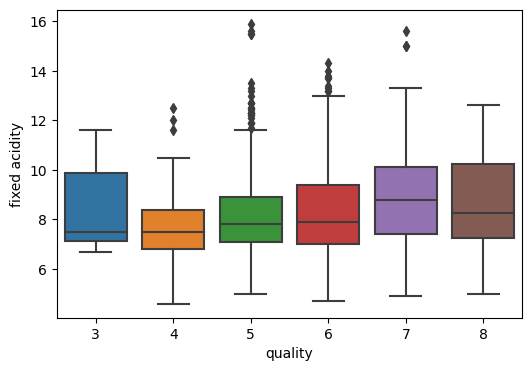

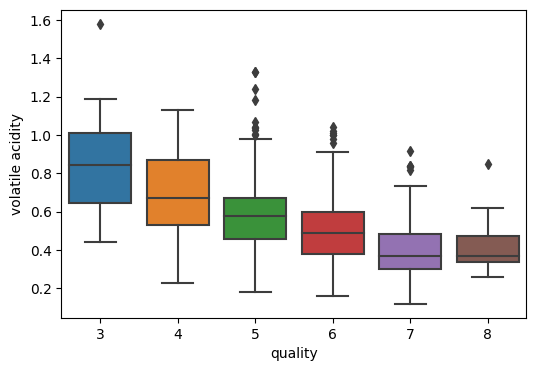

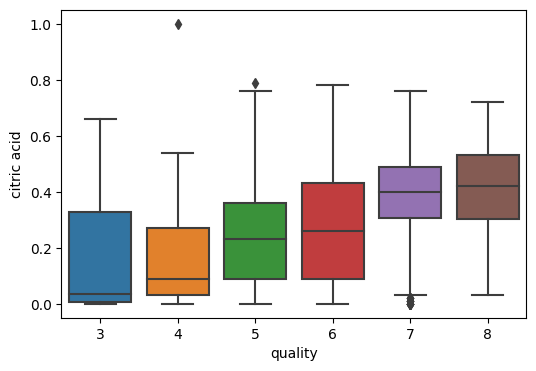

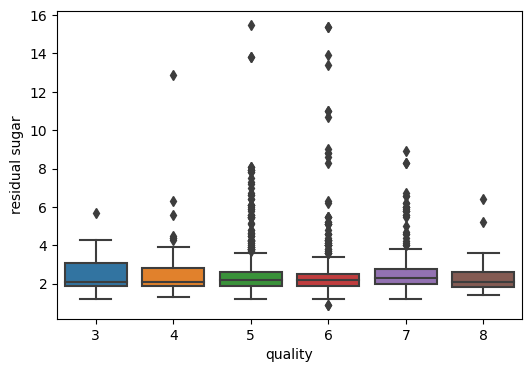

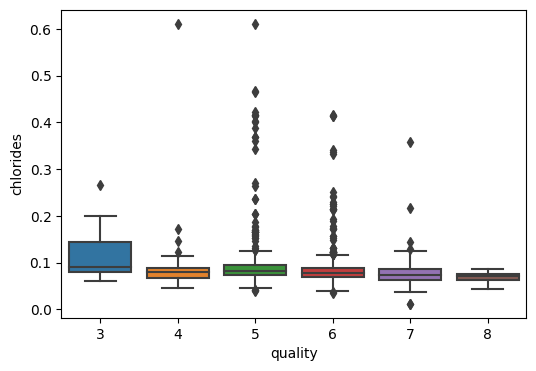

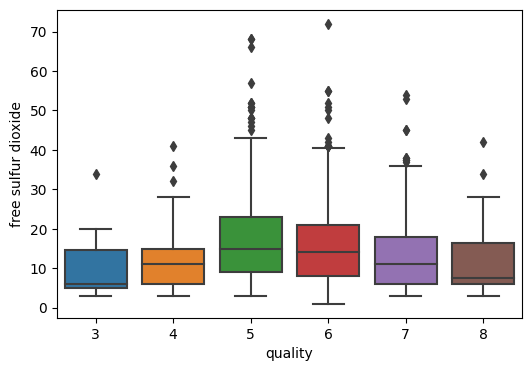

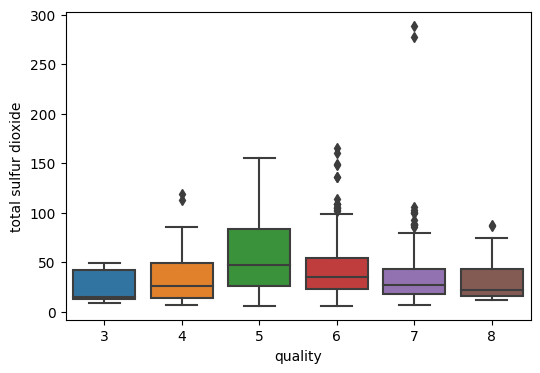

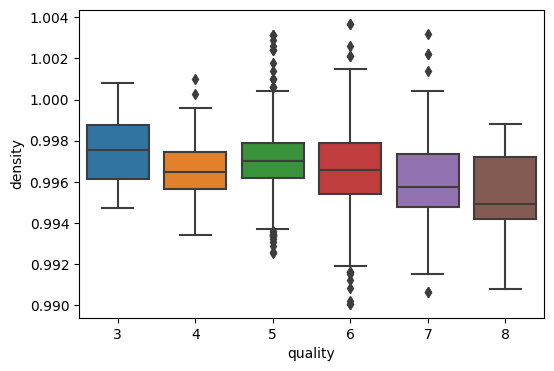

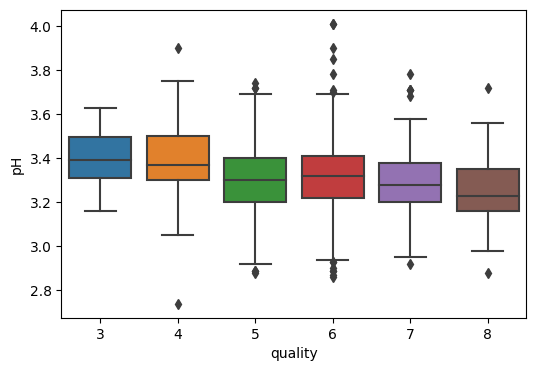

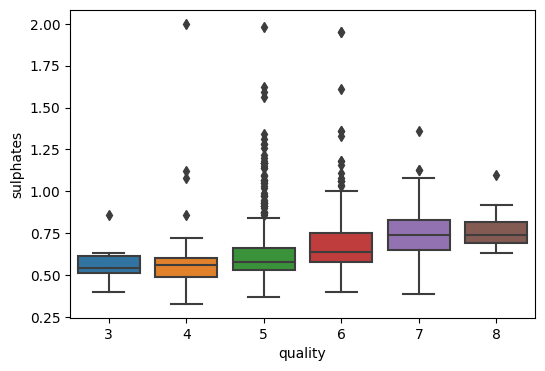

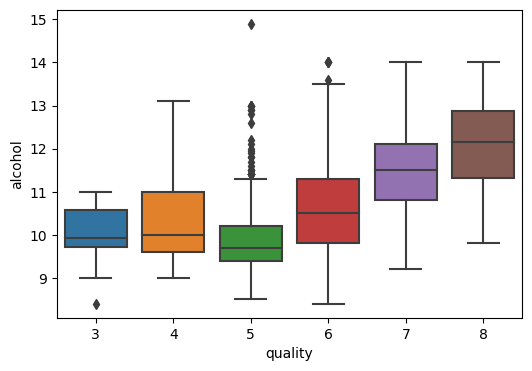

In [106]:
# loop for all the boxplots with quality
for col in df.columns.drop(['quality']):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='quality', y=col, data=df)
    



<Figure size 1000x800 with 0 Axes>

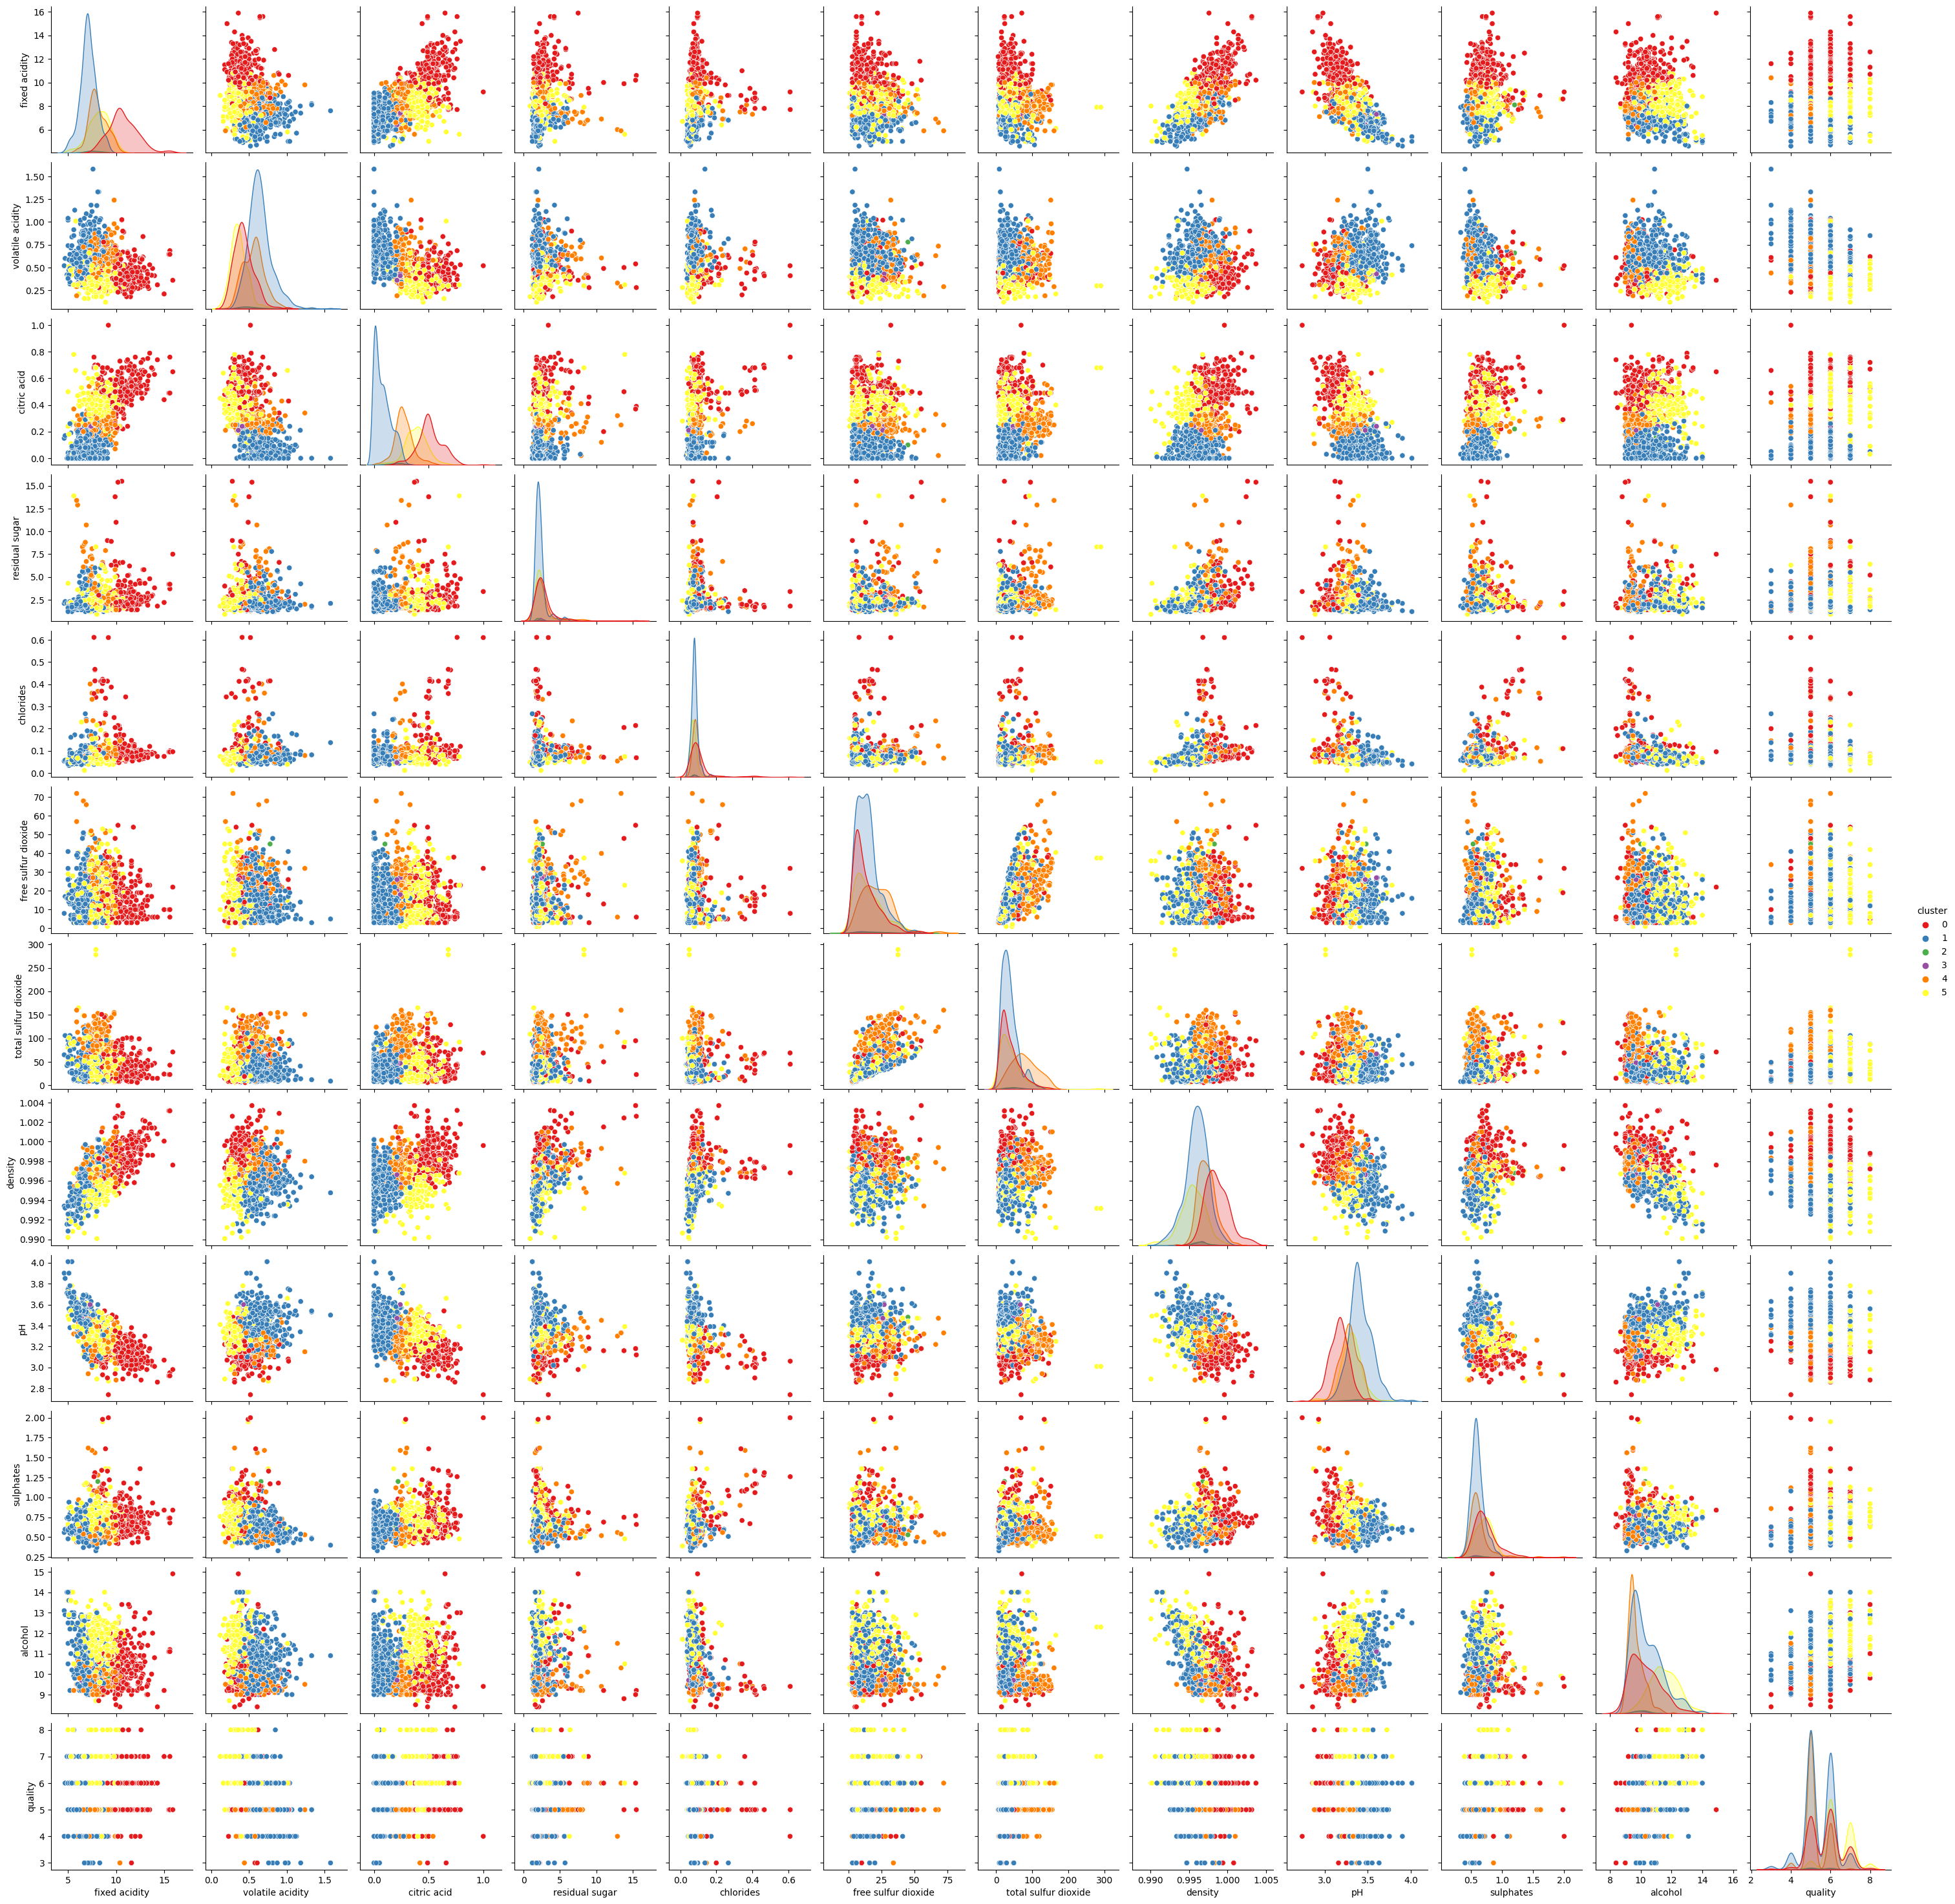

In [107]:
#  fuzzy means clustering quality the mains quality 
from skfuzzy import cmeans, cmeans_predict
from sklearn.preprocessing import MinMaxScaler

# scale the data
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

# cluster the data
cntr, u, u0, d, jm, p, fpc = cmeans(scaled_df.T, 6, 2, error=0.005, maxiter=1000, init=None)

# get the cluster labels
cluster_labels = np.argmax(u, axis=0)

# add the cluster labels to the original data
df['cluster'] = cluster_labels

# plot the clusters
plt.figure(figsize=(10, 8)) 
sns.pairplot( hue='cluster', data=df, palette='Set1')


In [108]:
df.iloc[-1]

fixed acidity            6.00000
volatile acidity         0.31000
citric acid              0.47000
residual sugar           3.60000
chlorides                0.06700
free sulfur dioxide     18.00000
total sulfur dioxide    42.00000
density                  0.99549
pH                       3.39000
sulphates                0.66000
alcohol                 11.00000
quality                  6.00000
cluster                  5.00000
Name: 1598, dtype: float64

In [109]:
# fit and build the model with the adapted algorithm and parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# FUZZY MEANS CLASSIFIER
from skfuzzy import cmeans, cmeans_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [110]:
# split the data
X = df.drop(['quality', 'cluster'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# import learning curve
from sklearn.model_selection import learning_curve

# define the function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.2, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [175]:
# model 1 with random forest
rf = RandomForestClassifier()

# model 2 with logistic regression
lr = LogisticRegression()

# model 3 with fuzzy means classifier and pipeline for preprocessing

In [173]:
# model 3 with fuzzy means classifier and pipeline for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# cluster the data
cntr, u, u0, d, jm, p, fpc = cmeans(scaled_df.T, 6, 2, error=0.005, maxiter=1000, init=None)

# get the cluster labels
cluster_labels = np.argmax(u, axis=0)

# add the cluster labels to the original data
df['cluster'] = cluster_labels

# split the data
X = df.drop(['quality', 'cluster'], axis=1)
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('fuzzy', GaussianNB())])

# fit the model
pipe.fit(X_train, y_train)

# predict the test data
y_pred = pipe.predict(X_test)

# print the accuracy score
print('Accuracy score : \n', accuracy_score(y_test, y_pred))
# print the confusion matrix
print('Confusion matrix : \n', confusion_matrix(y_test, y_pred))
# print the classification report
print('Classification report : \n', classification_report(y_test, y_pred))


Accuracy score : 
 0.828125
Confusion matrix : 
 [[ 33   2   7   0   4]
 [  1  93   2   2   8]
 [  6   1 118   0   1]
 [  0   1   0   0   1]
 [ 17   2   0   0  21]]
Classification report : 
               precision    recall  f1-score   support

           0       0.58      0.72      0.64        46
           1       0.94      0.88      0.91       106
           2       0.93      0.94      0.93       126
           4       0.00      0.00      0.00         2
           5       0.60      0.53      0.56        40

    accuracy                           0.83       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.84      0.83      0.83       320



c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


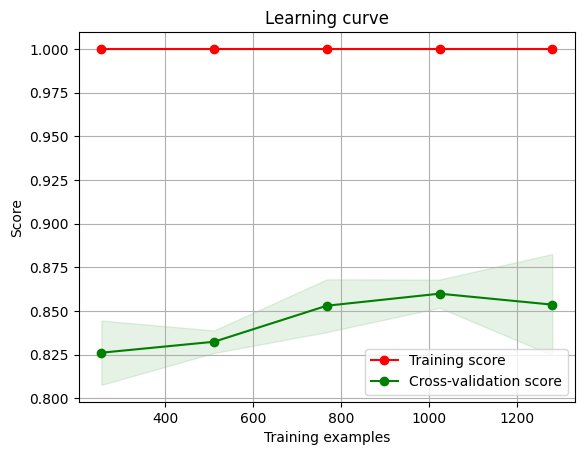

c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

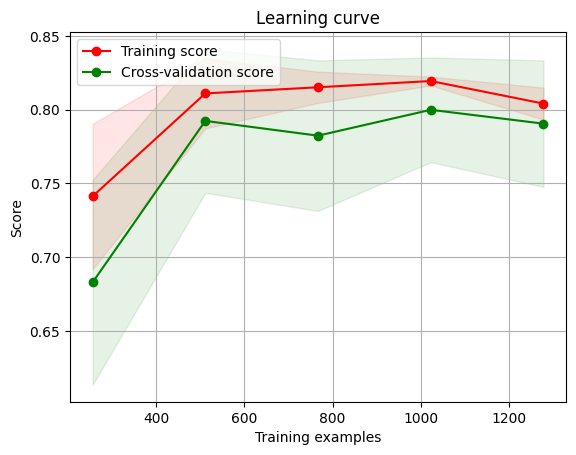

c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


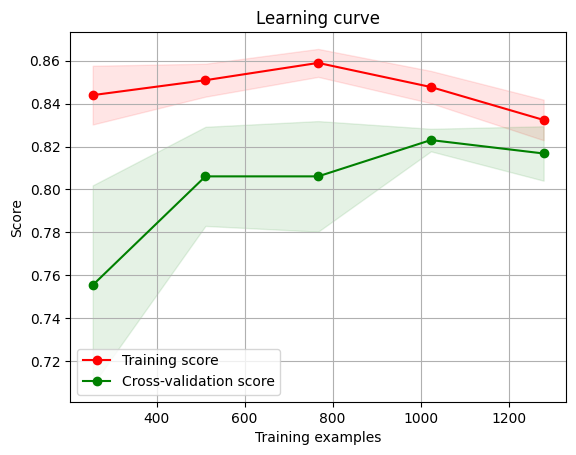

In [176]:
models = [rf, lr, pipe]

for model in models:
    plot_learning_curve(model, 'Learning curve', X, y, cv=5)
    plt.show()

c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

<module 'matplotlib.pyplot' from 'c:\\Users\\latio\\OneDrive\\Bureau\\DAS\\DASIER\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

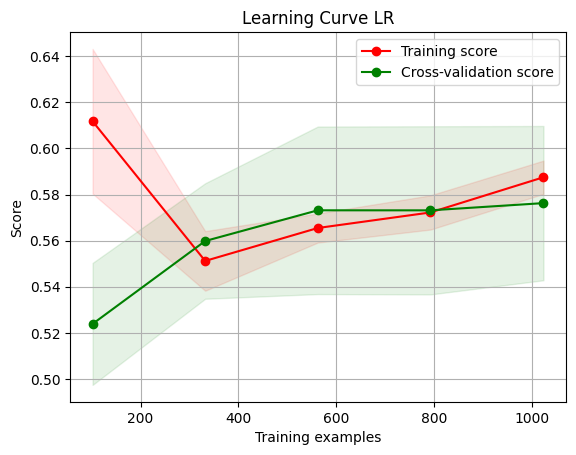

In [37]:
plot_learning_curve(LogisticRegression(), 'Learning Curve LR', X_train, y_train, cv=5)

c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


<module 'matplotlib.pyplot' from 'c:\\Users\\latio\\OneDrive\\Bureau\\DAS\\DASIER\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

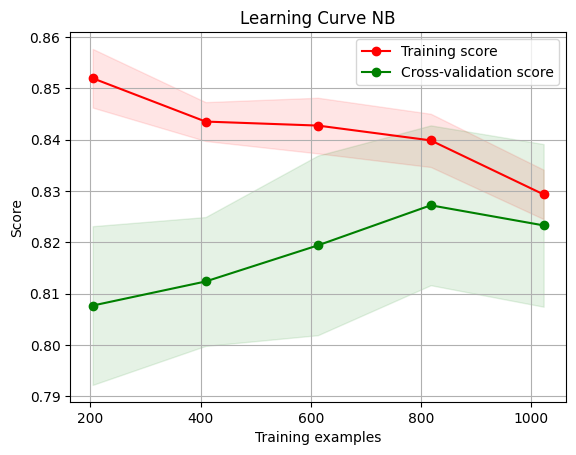

In [177]:
plot_learning_curve(GaussianNB(), 'Learning Curve NB', X_train, y_train, cv=5)

In [76]:
# build the model sans oublier la pipeline standarcaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# build the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

# fit the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [77]:
# predict the test data
y_pred = pipe.predict(X_test)


In [78]:
df

fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      free sulfur dioxide    pH  sulphates  alcohol  quality  cluster  
0                    11.0  3.51       0.56      9.4        5        3  
1                    25.0  3.20       0.68      9.8        5        3  
2                    15.0  3.26       0.65      9.8        5        3  
3                    17.0  3.16       0.58      9.8        6        2  
4                    11.0  3.51       0.56      9.4        5        3  
...                   ...   ...        ...      ...      ...      ...  
1594                 32.0  3.45       0.58     10.5        5        3  
1595                 39.0  3.52       0.76     11.2        6        3  
1596                 29.0  3.42       0.75     11.0        6        3  
1597                 32.0  3.57       0.71     10.2        5        3  
1598                 18.0  3.39       0.66     11.0        6        4  

[1599 rows x 10 columns]

In [80]:

# evaluate the model
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report :\n', classification_report(y_test, y_pred))



Accuracy : 0.671875
Confusion Matrix : 
 [[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 98 31  1  0]
 [ 0  0 29 95  7  1]
 [ 0  0  1 18 22  1]
 [ 0  0  0  2  3  0]]
Classification Report :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.64      0.72      0.68       132
           7       0.67      0.52      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.64      0.67      0.66       320



c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [ ]:
# best params
grid.best_params_

{'rf__max_depth': 20,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 200}

In [186]:
# build the model with the best parameters
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1))])

# fit the model
pipe.fit(X_train, y_train)

# predict the test data
y_pred = pipe.predict(X_test)

# evaluate the model
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :', confusion_matrix(y_test, y_pred))
print('Classification Report :', classification_report(y_test, y_pred))



Accuracy : 0.89375
Confusion Matrix : [[ 36   0   8   0   2]
 [  0 101   3   0   2]
 [  2   0 123   0   1]
 [  0   1   0   0   1]
 [  7   3   4   0  26]]
Classification Report :               precision    recall  f1-score   support

           0       0.80      0.78      0.79        46
           1       0.96      0.95      0.96       106
           2       0.89      0.98      0.93       126
           4       0.00      0.00      0.00         2
           5       0.81      0.65      0.72        40

    accuracy                           0.89       320
   macro avg       0.69      0.67      0.68       320
weighted avg       0.89      0.89      0.89       320



c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [ ]:
X_train.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
493            8.7             0.690         0.31      0.086   
354            6.1             0.210         0.40      0.066   
342           10.9             0.390         0.47      0.118   
834            8.8             0.685         0.26      0.088   
705            8.4             1.035         0.15      0.073   

     free sulfur dioxide    pH  sulphates  alcohol  
493                 23.0  3.48       0.74     11.6  
354                 40.5  3.25       0.59     11.9  
342                  6.0  3.30       0.75      9.8  
834                 16.0  3.32       0.47      9.4  
705                 11.0  3.37       0.49      9.9

In [94]:
df

fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      free sulfur dioxide    pH  sulphates  alcohol  quality  cluster  
0                    11.0  3.51       0.56      9.4        5        3  
1                    25.0  3.20       0.68      9.8        5        3  
2                    15.0  3.26       0.65      9.8        5        3  
3                    17.0  3.16       0.58      9.8        6        2  
4                    11.0  3.51       0.56      9.4        5        3  
...                   ...   ...        ...      ...      ...      ...  
1594                 32.0  3.45       0.58     10.5        5        3  
1595                 39.0  3.52       0.76     11.2        6        3  
1596                 29.0  3.42       0.75     11.0        6        3  
1597                 32.0  3.57       0.71     10.2        5        3  
1598                 18.0  3.39       0.66     11.0        6        4  

[1599 rows x 10 columns]

In [187]:
# test the model with a new data
new_data = [6.8,0.785,0.0,2.4,0.10400000000000001,14.0,30.0,0.9966,3.52,0.55,10.7]

new_data = np.array(new_data).reshape(1, -1)

# print(lr.predict(new_data))
# predict the new data
print(pipe.predict(new_data))



[2]


c:\Users\latio\OneDrive\Bureau\DAS\DASIER\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
